# Proyek Analisis Data: E-commerce-public-dataset
- **Nama:** Muhammad Salwa Fairus Santoso
- **Email:** iwacooyml@gmail.com
- **ID Dicoding:** fairus

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Menentukan Pertanyaan Bisnis

- Produk apa yang paling banyak dan sedikit terjual?
- Persebaran customer dari daerah geografis mana yang paling banyak?
- Bagaimana tingkat kepuasan customer?

## Import Semua Packages/Library yang Digunakan

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import matplotlib.image as mpimg
import urllib.request
import geopandas as gpd
from shapely.geometry import Point

## Data Wrangling

### Gathering Data

In [3]:
customers_df = pd.read_csv("drive/MyDrive/dataset/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
geolocation_df = pd.read_csv("drive/MyDrive/dataset/geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [5]:
order_items_df = pd.read_csv("drive/MyDrive/dataset/order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [6]:
order_payments_df = pd.read_csv("drive/MyDrive/dataset/order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [7]:
order_reviews_df = pd.read_csv("drive/MyDrive/dataset/order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [8]:
orders_df = pd.read_csv("drive/MyDrive/dataset/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [9]:
product_category_df = pd.read_csv("drive/MyDrive/dataset/product_category_name_translation.csv")
product_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [10]:
products_df = pd.read_csv("drive/MyDrive/dataset/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [11]:
sellers_df = pd.read_csv("drive/MyDrive/dataset/sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

**Menilai Data**

In [12]:
print("="*40)
print("Customer DataFrame Info")
print("="*40)
customers_df.info()

print("\n" + "="*40)
print("Geolocation DataFrame Info")
print("="*40)
geolocation_df.info()

print("\n" + "="*40)
print("Order Items DataFrame Info")
print("="*40)
order_items_df.info()

print("\n" + "="*40)
print("Order Payments DataFrame Info")
print("="*40)
order_payments_df.info()

print("\n" + "="*40)
print("Order Reviews DataFrame Info")
print("="*40)
order_reviews_df.info()

print("\n" + "="*40)
print("Orders DataFrame Info")
print("="*40)
orders_df.info()

print("\n" + "="*40)
print("Product Category DataFrame Info")
print("="*40)
product_category_df.info()

print("\n" + "="*40)
print("Products DataFrame Info")
print("="*40)
products_df.info()

print("\n" + "="*40)
print("Sellers DataFrame Info")
print("="*40)
sellers_df.info()


Customer DataFrame Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB

Geolocation DataFrame Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64


**Insight:**


**Terdapat kesalahan pada beberapa kolom dalam dataset yang memiliki tipe data Object, padahal seharusnya bertipe Datetime.**



***Order Reviews***

review_creation_date     

review_answer_timestamp  

***Order Items***

shipping_limit_date

***Orders***

order_purchase_timestamp         

order_approved_at              

order_delivered_carrier_date   

order_delivered_customer_date  

order_estimated_delivery_date  


**Pengecekan data yang kosong**

In [13]:
null_data = order_reviews_df.isnull().sum().reset_index()
null_data.columns = ["Order Reviews Dataset", "Missing Values"]

print("Data Null:\n")
print(tabulate(null_data, headers="keys", tablefmt="grid"))

print("\n")
null_data = orders_df.isnull().sum().reset_index()
null_data.columns = ["Orders Dataset", "Missing Values"]

print(tabulate(null_data, headers="keys", tablefmt="grid"))

print("\n")
null_data = products_df.isnull().sum().reset_index()
null_data.columns = ["Products Dataset", "Missing Values"]

print(tabulate(null_data, headers="keys", tablefmt="grid"))

print("\n")
null_data = customers_df.isnull().sum().reset_index()
null_data.columns = ["Customers Dataset", "Missing Values"]
print(tabulate(null_data, headers="keys", tablefmt="grid"))

print("\n")
null_data = geolocation_df.isnull().sum().reset_index()
null_data.columns = ["Geolocation Dataset", "Missing Values"]
print(tabulate(null_data, headers="keys", tablefmt="grid"))

print("\n")
null_data = order_items_df.isnull().sum().reset_index()
null_data.columns = ["Order Items Dataset", "Missing Values"]
print(tabulate(null_data, headers="keys", tablefmt="grid"))

print("\n")
null_data = order_payments_df.isnull().sum().reset_index()
null_data.columns = ["Order Payments Dataset", "Missing Values"]
print(tabulate(null_data, headers="keys", tablefmt="grid"))

print("\n")
null_data = product_category_df.isnull().sum().reset_index()
null_data.columns = ["Product Category Dataset", "Missing Values"]
print(tabulate(null_data, headers="keys", tablefmt="grid"))

print("\n")
null_data = sellers_df.isnull().sum().reset_index()
null_data.columns = ["Sellers Dataset", "Missing Values"]
print(tabulate(null_data, headers="keys", tablefmt="grid"))



Data Null:

+----+-------------------------+------------------+
|    | Order Reviews Dataset   |   Missing Values |
+====+=========================+==================+
|  0 | review_id               |                0 |
+----+-------------------------+------------------+
|  1 | order_id                |                0 |
+----+-------------------------+------------------+
|  2 | review_score            |                0 |
+----+-------------------------+------------------+
|  3 | review_comment_title    |            87656 |
+----+-------------------------+------------------+
|  4 | review_comment_message  |            58247 |
+----+-------------------------+------------------+
|  5 | review_creation_date    |                0 |
+----+-------------------------+------------------+
|  6 | review_answer_timestamp |                0 |
+----+-------------------------+------------------+


+----+-------------------------------+------------------+
|    | Orders Dataset                |   Mis

**Terdapat Missing Value pada 3 dataset, yaitu:**
- Order Reviews
- Orders
- Products


**Duplicate check**

In [14]:
print("Jumlah duplikat pada customers: ", customers_df.duplicated().sum())
print("Jumlah duplikat pada geolocation: ", geolocation_df.duplicated().sum())
print("Jumlah duplikat pada order items: ", order_items_df.duplicated().sum())
print("Jumlah duplikat pada order payments: ", order_payments_df.duplicated().sum())
print("Jumlah duplikat pada order reviews: ", order_reviews_df.duplicated().sum())
print("Jumlah duplikat pada orders: ", orders_df.duplicated().sum())
print("Jumlah duplikat pada product category: ", product_category_df.duplicated().sum())
print("Jumlah duplikat pada products: ", products_df.duplicated().sum())
print("Jumlah duplikat pada sellers: ", sellers_df.duplicated().sum())

Jumlah duplikat pada customers:  0
Jumlah duplikat pada geolocation:  261831
Jumlah duplikat pada order items:  0
Jumlah duplikat pada order payments:  0
Jumlah duplikat pada order reviews:  0
Jumlah duplikat pada orders:  0
Jumlah duplikat pada product category:  0
Jumlah duplikat pada products:  0
Jumlah duplikat pada sellers:  0


**Menganalisis statistik deskriptif**

In [15]:
datasets = {
    "Customers": customers_df,
    "Geolocation": geolocation_df,
    "Order Items": order_items_df,
    "Order Payments": order_payments_df,
    "Order Reviews": order_reviews_df,
    "Orders": orders_df,
    "Product Category": product_category_df,
    "Products": products_df,
    "Sellers": sellers_df
}

for name, df in datasets.items():
    print("=" * 50)
    print(f"📊 Data Describe untuk: {name}")
    print("=" * 50)
    print(df.describe(include="all"))
    print("\n")



📊 Data Describe untuk: Customers
                             customer_id                customer_unique_id  \
count                              99441                             99441   
unique                             99441                             96096   
top     06b8999e2fba1a1fbc88172c00ba8bc7  8d50f5eadf50201ccdcedfb9e2ac8455   
freq                                   1                                17   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

        customer_zip_code_pref

### Cleaning Data

**1. Data duplicat**

**Data duplicat**  terdapat pada dataset geolocation, yang dimana duplikasi data didapat dari nilai tabel 'geolocation_city' dan 'geolocation_state', dimana data tersebut berisi nama kota dari pembeli.

Oleh karena itu, dropping data tidak diperlukan

In [16]:
geolocation_df[geolocation_df.geolocation_city.duplicated()]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
6,1047,-23.546273,-46.641225,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


**2. Missing Value**

In [17]:
order_reviews_df[order_reviews_df.review_comment_title.isnull()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [18]:
order_reviews_df.review_comment_title.value_counts()

,count
review_comment_title,
Recomendo,423
recomendo,345
Bom,293
super recomendo,270
Excelente,248
...,...
Luminaria sobrepor led 18,1
Não recebi.,1
produto com lacre violado,1


In [19]:
order_reviews_df[order_reviews_df.review_comment_message.isnull()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34
...,...,...,...,...,...,...,...
99217,c6b270c61f67c9f7cb07d84ea8aeaf8b,48f7ee67313eda32bfcf5b9c1dd9522d,5,NaN,NaN,2017-12-13 00:00:00,2017-12-14 11:09:36
99218,af2dc0519de6e0720ef0c74292fb4114,d699c734a0b1c8111f2272a3f36d398c,5,NaN,NaN,2018-04-27 00:00:00,2018-04-30 01:18:57
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42


In [20]:
order_reviews_df.review_comment_message.value_counts()

,count
review_comment_message,
Muito bom,230
Bom,189
muito bom,122
bom,107
Recomendo,100
...,...
PRODUTO FOI ENTREGUE VIA CORREIOS\r\nANTES DO PRAZO PREVISTO.,1
"Devido incompatibilidade vou devolver, ótimo produto!",1
Infelizmente não! A qualidade do produto não agradou.Impressão da foto em exposição remete a um tamanho maior e a recebida sequer atende a uma criança. PRODUTO NÃO JUSTIFICA O VALOR INFELIZMENTE!,1


In [21]:
order_reviews_df.fillna(value='sem comentários', inplace=True)

mengatasi value yang kosong menggunakan metode ***imputation***, mengisi nilai pada tabel ***'review_comment_message'*** dan ***'review_comment_title'*** dengan 'sem comentários' artinya 'no comment'

In [22]:
order_reviews_df.isnull().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,0
review_comment_message,0
review_creation_date,0
review_answer_timestamp,0


masalah value kosong telah teratasi

**3. Tipe data**

In [23]:
datetime_columns = ["review_creation_date", "review_answer_timestamp"]

for column in datetime_columns:
  order_reviews_df[column] = pd.to_datetime(order_reviews_df[column])

mengganti tipe data pada ***'review_creation_date'*** dan ***'review_answer_timestamp'***

In [24]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     99224 non-null  object        
 4   review_comment_message   99224 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


tipe data yang sebelumnya **object** telah berganti menjadi **datetime**

In [25]:
order_items_df.shipping_limit_date = pd.to_datetime(order_items_df.shipping_limit_date)

In [26]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [27]:
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

In [28]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


tipe data yang sebelumnya **object** telah berganti menjadi **datetime**

## Exploratory Data Analysis (EDA)

### 1.Explore Data Customer

In [29]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [30]:
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
80471,f65cf41dc7566470b447e365bf24e831,93338aa66ca9b0b58aa1dbd31080f158,32280,contagem,MG
46774,7ac7ace883b08e0cef262870603a1728,42f70a03b39bd3ed199fffbb836889b5,23010,rio de janeiro,RJ
49209,ddf33cdfb2eb21f708dca32e2bf4299f,26b0ac7346f185b022438efbb08d5e5a,11443,guaruja,SP
95551,d37a69de40751a15e695ac5b4d6d45d9,6f8780c1db942452a66cad83fd1ec67f,95084,caxias do sul,RS
41516,8f437c018d57b705d06574998fc4f348,eb679f5c31d49d7a27b04db1e948b959,28897,rio das ostras,RJ


In [31]:
customers_df.groupby(by='customer_city').customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
ibiara,1
rio espera,1
rio dos indios,1


persebaran pelanggan terbanyak berada pada ***sao paulo***

### 2. Explore Data Order Payments

In [32]:
order_payments_df.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [33]:
order_payments_df.sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
9432,bcc354647b3aa17143479db9c57f1ce9,1,credit_card,6,206.99
62290,6cc62a2c76cd0e02344dd2b2486178e2,1,boleto,1,73.43
39563,fc2f86d56413e4c2e64ffd50117f6a6b,2,voucher,1,100.00
63718,0ac83eb5438f811c9d825c0a059a0f28,1,boleto,1,165.80
72758,d274c6fec283184db0a84729351bf6cc,1,credit_card,1,40.96


In [34]:
order_payments_df.groupby(by='payment_type').order_id.nunique().sort_values(ascending=False)

,order_id
payment_type,
credit_card,76505
boleto,19784
voucher,3866
debit_card,1528
not_defined,3


### **3. Explore Data Order**

In [35]:
orders_df.describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 18:35:24.098800128,2018-01-04 21:49:48.138278656,2018-01-14 12:09:19.035542272,2018-01-24 03:08:37.730111232
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-12 23:24:16,2017-09-15 22:28:50.249999872,2017-09-25 22:07:22.249999872,2017-10-03 00:00:00
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 11:36:13,2018-01-24 16:10:58,2018-02-02 19:28:10.500000,2018-02-15 00:00:00
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 20:35:10,2018-05-08 13:37:45,2018-05-15 22:48:52.249999872,2018-05-25 00:00:00
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


In [36]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
43409,91c7af31bbff981f2530987c8d5d5ae2,01295bcfd2311c7b510c4c697f82b6be,delivered,2017-09-17 19:18:54,2017-09-17 19:30:22,2017-09-19 16:18:59,2017-10-13 11:42:21,2017-10-05
51886,fb22db4615517f44f8312846412a25bf,42d6ac9cd797fddcb767bbd9fa286d5b,delivered,2018-03-06 00:15:07,2018-03-06 00:29:02,2018-03-12 23:56:19,2018-04-03 13:16:37,2018-03-27
25628,9b1e6dedd7de3097acb7948dfd8cc359,4789cc608a76c22397fdf821a2bc2e88,delivered,2018-07-04 11:48:32,2018-07-05 16:31:58,2018-07-06 08:41:00,2018-07-09 20:56:06,2018-08-09
16324,3372398865ef7f00841c6ddeed00230d,a4744f1897b52388a19a1a44fcbc251e,delivered,2018-04-05 08:14:23,2018-04-05 08:29:09,2018-04-05 22:40:41,2018-04-11 22:12:22,2018-04-25
82407,52c0ffe5247337047280978e84d62979,4da71b283420d156c50159242d0691e7,delivered,2017-11-25 00:19:41,2017-11-25 03:11:51,2017-11-27 20:52:38,2017-12-05 22:48:02,2017-12-18


In [37]:
delivery_time = orders_df["order_delivered_customer_date"] - orders_df["order_delivered_carrier_date"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
orders_df["delivery_time"] = round(delivery_time/86400)

In [38]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
10407,5a854278109ac48d0a19b5a30590af27,823ddff9dd8959511a087d391e97a76d,delivered,2018-02-16 15:30:17,2018-02-16 15:47:00,2018-02-21 01:24:56,2018-02-23 12:42:10,2018-03-14,2.0
97956,ae28255c7b837ba319c9cbf1dfeeea0d,5a8b64ee6ccdae09ea823e6aa00e9517,delivered,2018-08-14 14:48:11,2018-08-14 15:04:45,2018-08-15 13:31:00,2018-08-20 11:56:43,2018-08-24,5.0
40035,7bb345539ace4f961167f1cf740679eb,d308e62191603a4c18790024ca6da6f1,delivered,2017-12-01 13:28:30,2017-12-01 13:35:24,2017-12-05 23:18:53,2017-12-11 18:29:22,2017-12-19,6.0
68587,2458754d32649761e2c31fd65cb3fdf7,c40a552a2a91b93d3ca144eb009a1190,delivered,2018-01-16 18:03:04,2018-01-16 18:31:02,2018-01-17 18:18:40,2018-01-26 14:54:24,2018-02-06,9.0
5900,3641f9fa33b23a96ddef8d28f440d8db,cdf31148c659090167c2868425d2a72f,delivered,2018-03-27 08:10:06,2018-03-27 08:25:56,2018-03-27 21:59:56,2018-04-19 21:42:49,2018-04-23,23.0


In [39]:
customer_id_in_orders_df =  orders_df.customer_id.tolist()
customers_df["status"] = customers_df["customer_id"].apply(lambda x: "Active" if x in customer_id_in_orders_df else "Non Active")
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
28905,a9aa6c09b9864e59e014ea18d9294775,940744273e01c305dca20074f672f57b,17400,garca,SP,Active
34228,f667a9ea537f04d56f04ffa59507c6be,84200972e47e8efd80dca0456a5b7bf6,74640,goiania,GO,Active
61560,b50a0774cd941fa6d114ea6f8ab0f7e0,dd7e46479bd881c7041783d9edeedfc1,26255,nova iguacu,RJ,Active
63199,3907d7c4513f0a3687e30d5106813a01,3587e725eea92ebd552d1606ec6cd58e,4439,sao paulo,SP,Active
27571,df97921197ef7add5cf3d5059b7f1160,a5a9d27465e5ad9ce3087693bfa67240,3121,sao paulo,SP,Active


In [40]:
customers_df.groupby(by='status').customer_id.count()

,customer_id
status,
Active,99441


semua customer pernah melakukan pembelian, jadi statusnya adalah active

In [41]:
orders_df.groupby(by='order_status').customer_id.count()

,customer_id
order_status,
approved,2
canceled,625
created,5
delivered,96478
invoiced,314
processing,301
shipped,1107
unavailable,609


###4. Proses Merge

## **customer_df** dengan **orders_df**

In [42]:
customer_order_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
customer_order_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Active
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,Active
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,Active
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,9.0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,Active
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.0,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,Active


Melakukan proses merge pada dataset ***customer_df*** dengan ***orders_df***

In [43]:
customer_order_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False).head(5)

,customer_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521


sao paulo merupakan kota paling banyak order masuk, sekitar 15540

In [44]:
customer_order_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False).head(5)

,customer_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045


SP merupakan Negara paling banyak orderan masuk

In [45]:
customer_order_df.groupby(by="customer_zip_code_prefix").customer_id.nunique().sort_values(ascending=False).head(5)

,customer_id
customer_zip_code_prefix,
22790,142
24220,124
22793,121
24230,117
22775,110


In [46]:
customer_order_df.groupby(by="order_status").order_id.nunique().sort_values(ascending=False).head(5)

,order_id
order_status,
delivered,96478
shipped,1107
canceled,625
unavailable,609
invoiced,314


Terdapat 96478 orderan yang diterima oleh pelanggan, dan yang lainnya sedang proses dan ada juga yang di cancel sebesar 625

## **order_payments** dengan **order_reviews**

In [47]:
order_payments_reviews_df = pd.merge(
    left=order_payments_df,
    right=order_reviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
order_payments_reviews_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,sem comentários,sem comentários,2018-06-30,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,sem comentários,Aprovada,2017-12-19,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,sem comentários,sem comentários,2017-12-21,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,sem comentários,sem comentários,2017-12-21,2017-12-22 01:10:39


Melakukan proses merge pada dataset ***order_payments_df*** dengan ***order_reviews_df***

In [48]:
order_payments_reviews_df.groupby(by='payment_type').order_id.nunique().sort_values(ascending=False).head(5)

,order_id
payment_type,
credit_card,76505
boleto,19784
voucher,3866
debit_card,1528
not_defined,3


credit card merupakan salah satu tipe pembayaran yang sering digunakan dalam pesanan

In [49]:
order_payments_reviews_df.groupby(by='payment_value').order_id.nunique().sort_values(ascending=False).head(5)

,order_id
payment_value,
50.00,293
77.57,250
100.00,249
35.00,165
73.34,160


In [50]:
order_payments_reviews_df.sort_values(by="payment_value", ascending=False).head(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
52415,03caa2c082116e1d31e67e9ae3700499,1,credit_card,1,13664.08,211fa81a22870cc634265ea85b751e40,1.0,sem comentários,"Peço por favor verificar a entrega do pedido, ...",2017-10-18,2017-10-19 13:10:39
34565,736e1922ae60d0d6a89247b851902527,1,boleto,1,7274.88,6b9a600f1bb824da4ca38f65baf42526,1.0,Entrega incompleta,"Comprei 04 unidades, e foram entregues apenas ...",2018-07-27,2018-07-28 02:36:10
41660,0812eb902a67711a1cb742b3cdaa65ae,1,credit_card,8,6929.31,e2fbd9f0ef7b724c7ecb351601a857e7,5.0,sem comentários,"Mesmo a máquina ter vindo errada, já se pronti...",2017-03-04,2017-03-04 21:40:41
49871,fefacc66af859508bf1a7934eab1e97f,1,boleto,1,6922.21,NaN,NaN,NaN,NaN,NaT,NaT
86018,f5136e38d1a14a4dbd87dff67da82701,1,boleto,1,6726.66,1b73e6c7cd135008ebeb18404b776ddc,5.0,sem comentários,sem comentários,2017-06-06,2017-06-07 19:35:23


In [51]:
order_payments_reviews_df.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "review_score": ["min", "max", "mean"],
    "payment_value":  ["min", "max", "mean"]
})

order_id review_score                payment_value            \
              nunique          min  max      mean           min       max   
payment_type                                                                
boleto          19784          1.0  5.0  4.086631         11.62   7274.88   
credit_card     76505          1.0  5.0  4.087637          0.01  13664.08   
debit_card       1528          1.0  5.0  4.168084         13.38   4445.50   
not_defined         3          1.0  3.0  1.666667          0.00      0.00   
voucher          3866          1.0  5.0  4.003804          0.00   3184.34   

                          
                    mean  
payment_type              
boleto        144.986413  
credit_card   163.140977  
debit_card    142.396569  
not_defined     0.000000  
voucher        65.499655

credit card dan Boleto adalah metode pembayaran paling populer.

##**orders_item_df** dengan **sellers_df**

In [52]:
orders_items_sellers_df = pd.merge(
    left=order_items_df,
    right=sellers_df,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
orders_items_sellers_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


Melakukan proses merge pada dataset ***order_items_df*** dengan ***sellers_df***

In [53]:
orders_items_sellers_df.groupby('seller_zip_code_prefix').seller_id.nunique().sort_values(ascending=False).head()

,seller_id
seller_zip_code_prefix,
14940,49
13660,10
13920,9
16200,9
87050,8


ada sebanyak 49 seller dengan zip code 14940

In [54]:
orders_items_sellers_df.groupby('seller_city').seller_id.nunique().sort_values(ascending=False).head()

,seller_id
seller_city,
sao paulo,694
curitiba,127
rio de janeiro,96
belo horizonte,68
ribeirao preto,52


sebanyak 694 seller, menempati kota sao paulo

In [55]:
orders_items_sellers_df.groupby('seller_state').seller_id.nunique().sort_values(ascending=False).head()

,seller_id
seller_state,
SP,1849
PR,349
MG,244
SC,190
RJ,171


sebanyak 1849 seller, menempati state SP

##**product_df** dengan **product_category_df**

In [56]:
products_new_category_df = pd.merge(
    left=products_df,
    right=product_category_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
products_new_category_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [57]:
products_new_category_df.groupby(by='product_category_name').product_id.nunique().sort_values(ascending=False)

,product_id
product_category_name,
cama_mesa_banho,3029
esporte_lazer,2867
moveis_decoracao,2657
beleza_saude,2444
utilidades_domesticas,2335
...,...
casa_conforto_2,5
fashion_roupa_infanto_juvenil,5
pc_gamer,3


In [58]:
products_new_category_df.groupby(by='product_category_name_english').product_id.nunique().sort_values(ascending=False)

,product_id
product_category_name_english,
bed_bath_table,3029
sports_leisure,2867
furniture_decor,2657
health_beauty,2444
housewares,2335
...,...
tablets_printing_image,9
home_comfort_2,5
fashion_childrens_clothes,5


##**orders_items_sellers_df** dan **products_new_category_df**

In [59]:
new_product_sellers_df = pd.merge(
    left=orders_items_sellers_df,
    right=products_new_category_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
new_product_sellers_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools


In [60]:
new_product_sellers_df.groupby(by='product_category_name_english').agg({
    'order_id': 'nunique',
    'price': ['min', 'max']
})

order_id  price         
                               nunique    min      max
product_category_name_english                         
agro_industry_and_commerce         182  12.99  2990.00
air_conditioning                   253  10.90  1599.00
art                                202   3.50  6499.00
arts_and_craftmanship               23   9.80   289.49
audio                              350  14.90   598.99
...                                ...    ...      ...
stationery                        2311   2.29  1693.00
tablets_printing_image              79  14.90   889.99
telephony                         4199   5.00  2428.00
toys                              3886   4.90  1699.99
watches_gifts                     5624   8.99  3999.90

[71 rows x 3 columns]

##**customer_order_df** dengan **order_payments_reviews_df**

In [61]:
new_customers_df = pd.merge(
    left=customer_order_df,
    right=order_payments_reviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
new_customers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0,7c396fd4830fd04220f754e42b4e5bff,...,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,sem comentários,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0,7c396fd4830fd04220f754e42b4e5bff,...,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,sem comentários,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0,7c396fd4830fd04220f754e42b4e5bff,...,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,sem comentários,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12.0,af07308b275d755c9edb36a90c618231,...,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,3a653a41f6f9fc3d2a113cf8398680e8,...,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,sem comentários,sem comentários,2018-08-18,2018-08-22 19:07:58


##**merge semua data**

In [62]:
all_data_df = pd.merge(
    left=new_customers_df,
    right=new_product_sellers_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_data_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,...,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0,7c396fd4830fd04220f754e42b4e5bff,...,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0,7c396fd4830fd04220f754e42b4e5bff,...,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0,7c396fd4830fd04220f754e42b4e5bff,...,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12.0,af07308b275d755c9edb36a90c618231,...,SP,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,3a653a41f6f9fc3d2a113cf8398680e8,...,SP,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto


In [63]:
all_data_df.groupby(by='product_category_name_english').agg({
    'order_id': 'nunique',
    'review_score': ['min','max','mean']
})

order_id review_score               
                               nunique          min  max      mean
product_category_name_english                                     
agro_industry_and_commerce         182          1.0  5.0  4.150794
air_conditioning                   253          1.0  5.0  3.969697
art                                202          1.0  5.0  3.935484
arts_and_craftmanship               23          1.0  5.0  4.125000
audio                              350          1.0  5.0  3.840849
...                                ...          ...  ...       ...
stationery                        2311          1.0  5.0  4.188339
tablets_printing_image              79          1.0  5.0  4.117647
telephony                         4199          1.0  5.0  3.948849
toys                              3886          1.0  5.0  4.162506
watches_gifts                     5624          1.0  5.0  4.017692

[71 rows x 4 columns]

melihat nama produk dengan nilai review tertentu

In [64]:
all_data_df.groupby(by=['product_category_name_english', 'customer_state','seller_state',]).agg({
    'order_id': 'nunique',
    'delivery_time': ['min','max','mean']
}).sort_values(by=['product_category_name_english', 'customer_state','seller_state',], ascending=False)

order_id  \
                                                           nunique   
product_category_name_english customer_state seller_state            
watches_gifts                 TO             SP                 21   
                                             SC                  3   
                                             RJ                  2   
                                             MG                  1   
                              SP             SP               1803   
...                                                            ...   
agro_industry_and_commerce    CE             PR                  1   
                              BA             PR                  2   
                                             MG                  1   
                              AP             SP                  1   
                              AL             PR                  1   

                                                          delivery_time        \
                                                                    min   max   
product_category_name_english customer_state seller_state                       
watches_gifts                 TO             SP                     6.0  30.0   
                                             SC                    10.0  21.0   
                                             RJ                    14.0  14.0   
                                             MG                     6.0   6.0   
                              SP             SP                     1.0  84.0   
...                                                                 ...   ...   
agro_industry_and_commerce    CE             PR                    12.0  12.0   
                              BA             PR                    19.0  26.0   
                                             MG                    11.0  11.0   
                              AP             SP                    13.0  13.0   
                              AL             PR                    42.0  42.0   

                                                                      
                                                                mean  
product_category_name_english customer_state seller_state             
watches_gifts                 TO             SP            15.190476  
                                             SC            15.666667  
                                             RJ            14.000000  
                                             MG             6.000000  
                              SP             SP             4.981893  
...                                                              ...  
agro_industry_and_commerce    CE             PR            12.000000  
                              BA             PR            21.333333  
                                             MG            11.000000  
                              AP             SP            13.000000  
                              AL             PR            42.000000  

[4582 rows x 4 columns]

Melihat Produk watches_gifts yang dibeli oleh pelanggan di negara bagian TO dari penjual di negara bagian SP memiliki waktu pengiriman dengan nilai minimum 6 Hari, maksimum 30 Hari, dan rata-rata 15 Hari.

In [65]:
all_data_df.groupby(by='product_category_name_english').agg({
    'review_id' : 'nunique',
    'review_score': ['min','max','mean']
})

review_id review_score               
                                nunique          min  max      mean
product_category_name_english                                      
agro_industry_and_commerce          182          1.0  5.0  4.150794
air_conditioning                    249          1.0  5.0  3.969697
art                                 200          1.0  5.0  3.935484
arts_and_craftmanship                23          1.0  5.0  4.125000
audio                               348          1.0  5.0  3.840849
...                                 ...          ...  ...       ...
stationery                         2294          1.0  5.0  4.188339
tablets_printing_image               77          1.0  5.0  4.117647
telephony                          4170          1.0  5.0  3.948849
toys                               3856          1.0  5.0  4.162506
watches_gifts                      5582          1.0  5.0  4.017692

[71 rows x 4 columns]

In [66]:
all_data_df.groupby(by="customer_state").agg({
    "order_id": "nunique",
    "payment_value": "sum"
}).sort_values(by="payment_value", ascending=False)

,order_id,payment_value
customer_state,,
SP,41746,7726078.35
RJ,12852,2795615.67
MG,11635,2351221.09
RS,5466,1160175.66
PR,5045,1079795.49
BA,3380,805070.98
SC,3637,801276.45
GO,2020,520481.65
DF,2140,438095.32


In [67]:
all_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 42 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       119143 non-null  object        
 1   customer_id                    119143 non-null  object        
 2   order_status                   119143 non-null  object        
 3   order_purchase_timestamp       119143 non-null  datetime64[ns]
 4   order_approved_at              118966 non-null  datetime64[ns]
 5   order_delivered_carrier_date   117057 non-null  datetime64[ns]
 6   order_delivered_customer_date  115722 non-null  datetime64[ns]
 7   order_estimated_delivery_date  119143 non-null  datetime64[ns]
 8   delivery_time                  115721 non-null  float64       
 9   customer_unique_id             119143 non-null  object        
 10  customer_zip_code_prefix       119143 non-null  int64         
 11  

##**Export hasil data yang telah dibersihkan dan melalui proses merging**

In [68]:
all_data_df.to_csv('all_data_df.csv', index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Produk apa yang paling banyak dan sedikit terjual?

In [69]:
sum_order_items_df = all_data_df.groupby("product_category_name_english")["product_id"].count().reset_index()
sum_order_items_df = sum_order_items_df.rename(columns={"product_id": "products"})
sum_order_items_df = sum_order_items_df.sort_values(by="products", ascending=False)

In [70]:
sum_order_items_df.head()

,product_category_name_english,products
7,bed_bath_table,11988
43,health_beauty,10032
65,sports_leisure,9004
39,furniture_decor,8832
15,computers_accessories,8150


<ipython-input-71-07e0299dd38e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="products", y="product_category_name_english", data=sum_order_items_df.head(5), palette=top_colors, ax=ax[0])
<ipython-input-71-07e0299dd38e>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="products", y="product_category_name_english", data=sum_order_items_df.sort_values(by="products", ascending=True).head(5), palette=low_colors, ax=ax[1])


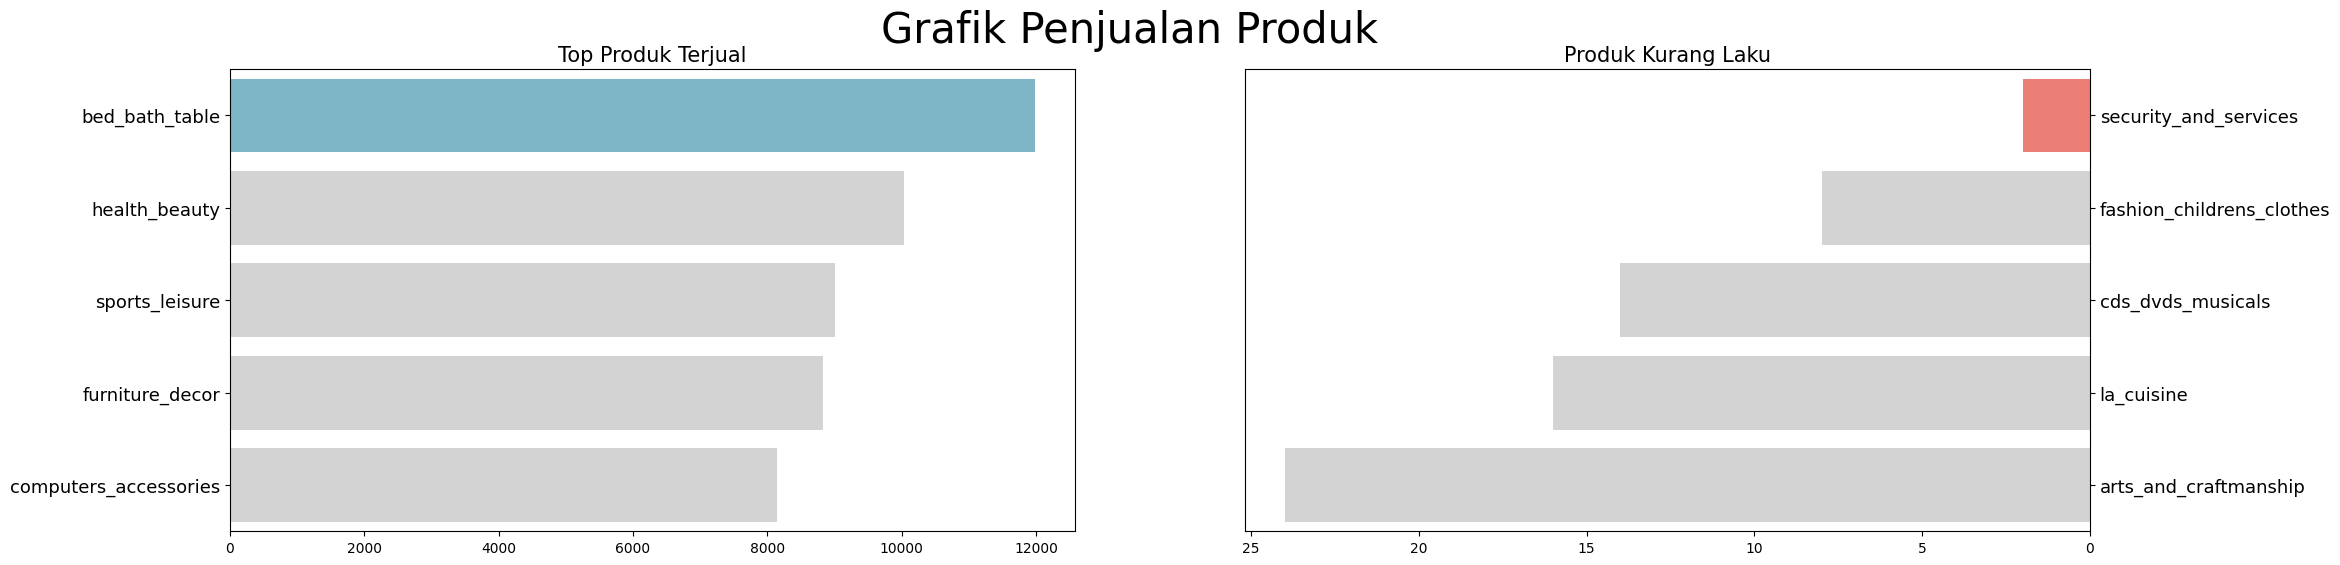

In [71]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

top_colors = ["#72BCD4"] + ["#D3D3D3"] * (len(sum_order_items_df.head(5)) - 1)
low_colors = ["#FF6F61"] + ["#D3D3D3"] * (len(sum_order_items_df.tail(5)) - 1)

sns.barplot(x="products", y="product_category_name_english", data=sum_order_items_df.head(5), palette=top_colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Top Produk Terjual", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=13)

sns.barplot(x="products", y="product_category_name_english", data=sum_order_items_df.sort_values(by="products", ascending=True).head(5), palette=low_colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Produk Kurang Laku", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=13)

plt.suptitle("Grafik Penjualan Produk", fontsize=30)
plt.show()

### Pertanyaan 2: Persebaran customer dari daerah geografis mana yang paling banyak?

***geospatial analysis***

In [101]:
customers_geo = pd.read_csv("geolocation.csv")

In [102]:
print(customers_geo.head())
print(customers_geo.columns)

                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
3  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
4  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   

   customer_zip_code_prefix          customer_city customer_state  status  \
0                   14409.0                 franca             SP  Active   
1                    9790.0  sao bernardo do campo             SP  Active   
2                    9790.0  sao bernardo do campo             SP  Active   
3                    1151.0              sao paulo             SP  Active   
4                    1151.0              sao paulo             SP  Active   

   geolocation_zip_code_prefix       geolocation_city geolocation_state  \
0                      

In [99]:
world = gpd.read_file("https://raw.githubusercontent.com/nvkelso/natural-earth-vector/master/geojson/ne_110m_admin_0_countries.geojson")
brazil = world[world["ADMIN"] == "Brazil"]  # Filter hanya Brazil

In [104]:
customers_geo['geometry'] = customers_geo.apply(lambda x: Point(x['geolocation_lng'], x['geolocation_lat']), axis=1)
customers_geo_gdf = gpd.GeoDataFrame(customers_geo, geometry='geometry', crs="EPSG:4326")

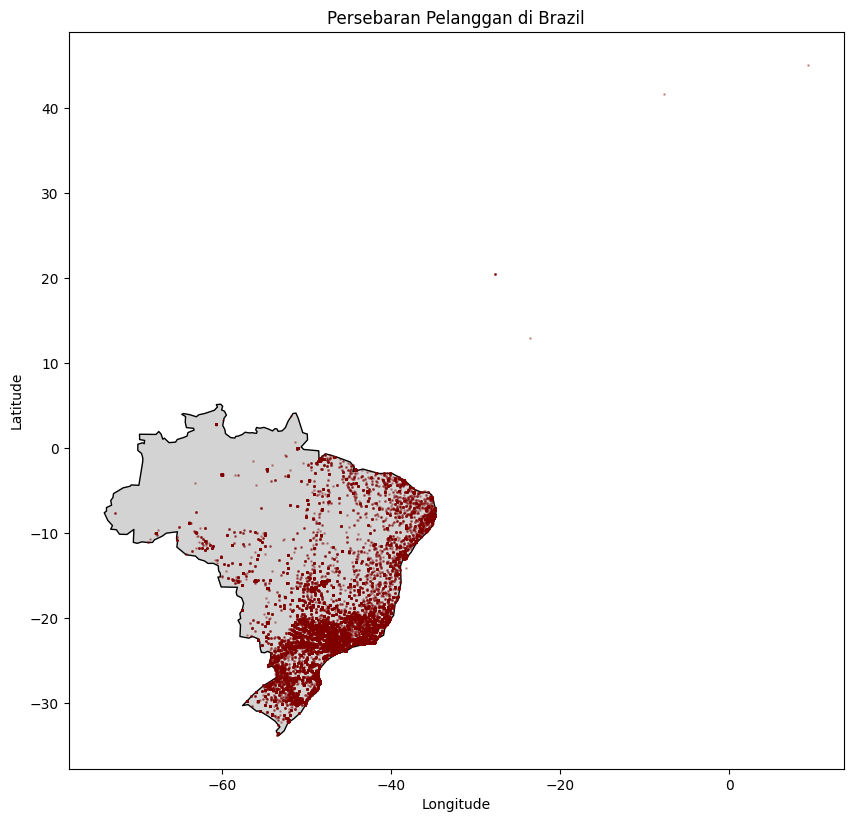

In [105]:
fig, ax = plt.subplots(figsize=(10, 10))
brazil.plot(ax=ax, color="lightgrey", edgecolor="black")
customers_geo_gdf.plot(ax=ax, markersize=1, color="maroon", alpha=0.3)
plt.title("Persebaran Pelanggan di Brazil")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

### **Pertanyaan 3: Bagaimana tingkat kepuasan customer?**

<ipython-input-108-c8b0b59a6eea>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


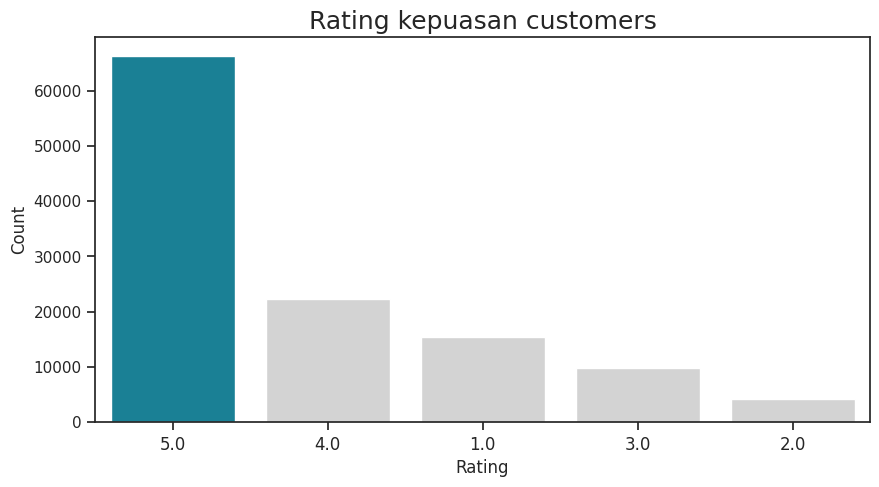

In [108]:
review_scores = all_data_df['review_score'].value_counts()

most_common_score = review_scores.idxmax()

review_scores_df = review_scores.reset_index()
review_scores_df.columns = ['rating', 'count']


sns.set(style="ticks")
plt.figure(figsize=(10, 5))

sns.barplot(
    data=review_scores_df,
    x="rating",
    y="count",
    order=review_scores_df["rating"],
    palette=["#068DA9" if score == most_common_score else "#D3D3D3" for score in review_scores_df["rating"]]
)


plt.title("Rating kepuasan customers", fontsize=18)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(fontsize=12)

plt.show()

**Customers cenderung memberikan rating 5.0 dalam memberikan ulasan**

## Analisis Lanjutan (Opsional)

## Conclusion


1.   Produk apa yang paling banyak dan sedikit terjual?
> Produk yang paling banyak terjual adalah bed_bath_ table dan produk yang kurang laku adalah security and service

2.   Persebaran customer dari daerah geografis mana yang paling banyak?
> Persebaran wilayah customer terdapat pada brazil bagian bawah
3.   Bagaimana tingkat kepuasan customer?
> Bedasarkan data yang didapat, mayoritas customers memberikan ulasan 5.0 yang artinya kebanyakan customers merasa puas








